# Assignment 2: Linear Models and Validation Metrics (40 marks total)
### Due: October 4 at 11:59pm

### Name: Destin Saba

### In this assignment, you will need to write code that uses linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

## Part 1: Classification (20 marks)

You have been asked to develop code that can help the user determine if the email they have received is spam or not. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

### Step 0: Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore') #ignoring some deprication warnings

### Step 1: Data Input (1 mark)

The data used for this task can be imported using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/spam.html

Use the yellowbrick function `load_spam()` to load the spam dataset into the feature matrix `X` and target vector `y`.

Print the size and type of `X` and `y`.

In [3]:
# TO DO: Import spam dataset from yellowbrick library (0.5 marks)
from yellowbrick.datasets.loaders import load_spam

# Load the spam dataset
X, y = load_spam()


# TO DO: Print the size of X and y (0.5 marks)
print("X shape:",X.shape)
print("X size:",X.size)

print("y shape:",y.shape)
print("y size:",y.size)

X shape: (4600, 57)
X size: 262200
y shape: (4600,)
y size: 4600


### Step 2: Data Processing (2 marks)

Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values.

In [4]:
# TO DO: Check if there are any missing values and fill them in if necessary (1 mark)
X.info()
y.info()

# There are no missing values in X and y

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4600 non-null   float64
 1   word_freq_address           4600 non-null   float64
 2   word_freq_all               4600 non-null   float64
 3   word_freq_3d                4600 non-null   float64
 4   word_freq_our               4600 non-null   float64
 5   word_freq_over              4600 non-null   float64
 6   word_freq_remove            4600 non-null   float64
 7   word_freq_internet          4600 non-null   float64
 8   word_freq_order             4600 non-null   float64
 9   word_freq_mail              4600 non-null   float64
 10  word_freq_receive           4600 non-null   float64
 11  word_freq_will              4600 non-null   float64
 12  word_freq_people            4600 non-null   float64
 13  word_freq_report            4600 

For this task, we want to test if the linear model would still work if we used less data. Use the `train_test_split` function from sklearn to create a new feature matrix named `X_small` and a new target vector named `y_small` that contain **4%** of the data. Use `random_state=0`.

In [5]:
# TO DO: Create X_small and y_small that contain 4% of the data (1 mark)
from sklearn.model_selection import train_test_split

_, X_small, _, y_small= train_test_split(X, y, test_size=0.04, random_state=0, stratify=y)

print("X_small size:",X_small.size)
print("y_small size:",y_small.size)

X_small size: 10488
y_small size: 184


### Step 3: Implement Machine Learning Model

1. Import `LogisticRegression` from sklearn
2. Instantiate model `LogisticRegression(max_iter=2000)`
3. Implement the machine learning model with three different datasets: 
    - `X` and `y`
    - Only first two columns of `X` and `y`
    - `X_small` and `y_small`

In [6]:
# Instantiate the Logistic Regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)


### Step 4: Validate Model 

Calculate the training and validation accuracy for the three different tests implemented in Step 3. For this case, you can use `cross_validate()` with `cv=5` and `scoring='accuracy'` to get the training and validation data for each of the three datasets and calculate the accuracy results.

### Step 5.1: Visualize Results (3 marks)

1. Create a pandas DataFrame `results` with columns: Data size, training accuracy, validation accuracy
2. Add the data size, training accuracy and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [7]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
from sklearn.model_selection import cross_validate

# Cross validate the model using the full dataset, the small dataset, and only the first two columns of the full dataset
scoresXy = cross_validate(model, X, y, cv=5, scoring='accuracy', return_train_score=True)
scoresXy_small = cross_validate(model, X_small, y_small, cv=5, scoring='accuracy', return_train_score=True)
scoresXy_two_cols = cross_validate(model, X.iloc[:,:2], y, cv=5, scoring='accuracy', return_train_score=True)

# Print the results
results = pd.DataFrame(columns=['Data size', 'Training accuracy', 'Validation accuracy'])
results.loc[0] = ['X, y', scoresXy['train_score'].mean(), scoresXy['test_score'].mean()]
results.loc[1] = ['X_small, y_small', scoresXy_small['train_score'].mean(), scoresXy_small['test_score'].mean()]
results.loc[2] = ['X_two_cols, y', scoresXy_two_cols['train_score'].mean(), scoresXy_two_cols['test_score'].mean()]
print(results)

          Data size  Training accuracy  Validation accuracy
0              X, y           0.930815             0.912826
1  X_small, y_small           0.940219             0.820571
2     X_two_cols, y           0.616250             0.609783


### Step 5.2: Visualize Classification Errors (2 marks)

In this section, print the confusion matrix to investigate the number of false positives vs. false negatives. Use the full dataset for this analysis

In [8]:
# TO DO: Retrieve target vector and predicted values for validation set using full dataset (1 mark)
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=0, stratify=y)

# Fit the model
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

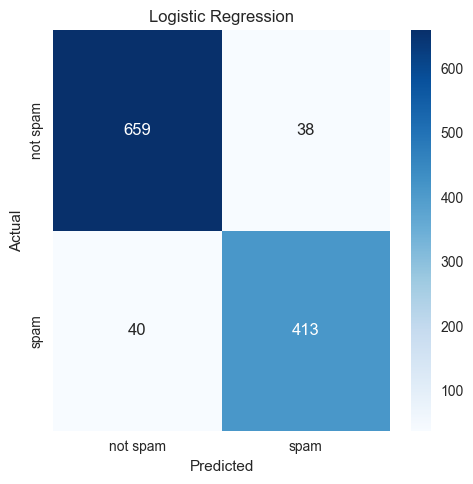

In [9]:
# TO DO: Print confusion matrix using a heatmap (1 mark)
# HINT: To remove scientific notation from a heatmap, set the parameter fmt='d'
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm_lr = confusion_matrix(y_test, y_pred)

# Set up the figure size using subplots
fig, axes = plt.subplots(figsize=(5, 5))

# Create a heatmap for Random Forest
sns.heatmap(cm_lr, xticklabels=['not spam', 'spam'],  yticklabels=['not spam', 'spam'],  annot=True, fmt='d', cmap='Blues', ax=axes)
axes.set_title('Logistic Regression')
axes.set_xlabel('Predicted')
axes.set_ylabel('Actual')

plt.tight_layout()
plt.show()

### Questions (8 marks)
1. How do the training and validation accuracy change depending on the amount of data used? Explain with values.
1. Why do the training and validation accuracy behave this way when the amount of data is changed? Relate your answer to concepts discussed in class.
1. Do these results change based on the `random_state` selected for splitting the data into X_small and y_small? Why do you think it behaves this way?
1. In this case, what do a false positive and a false negative represent? Which one is worse?

*ANSWER HERE*

1. The validation accuracy increased as more data was used. With the entire X and y dataset, the validation accuracy was ~0.91, with only 4% of the dataset (X_small and y_small) it was ~0.82, and with only 2 columns it was much lower at 0.61

    The training accuracy was similar (actually slightly lower) when using the entire dataset (~0.93) than it was when using only 4% of the datase (~0.94). 
    However, When using only 2 columns, the training accuracy was much lower (~0.62).

2. When more data is available, the model is able to learn and generalize better, which results in a higher validation accuracy, hence why the full dataset produced the best validation score. With smaller datasets, a model is more likely to overfit the training data (model has high-variance), which typically leads to a higher training score but a lower validation accuracy, and this was observed when using only 4% of the dataset. 
When using only 2 columns, we are significantly reducing the amount of features the model can learn from, which is why there was a substantial drop in both training and validation accuracy. The low (but similar) training and validation accuracy indicate a high bias.

3. Yes, these results change based on the `random_state` selected for splitting the data. The `random_state` predetermines how the data is split, and different splits will lead to slightly different performance. For example, a selected subset of the data may contain a disproportionately large amount of outliers, which the model would not know are outliers. These differences in performance will likely vary more with a smaller dataset. This is one reason cross-validation is used when selecting a model.

4. In this case, a false negative would be identifying a spam email as not spam. A false positive would be identifying a normal email as spam. I think that in this case, a false negative is worse. If a user expects emails that are not flagged as spam to be safe, a false negative would result in a spam email that could potentially contain a cybersecurity threat getting through. The negative consequences of a threat like this could be anything from losing one's banking information, to an attack on an entire organization. On the other hand, flagging a non-spam email as spam would just require users to check their spam folder every so often to make sure they don't miss an important email.  


### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE - BE SPECIFIC*

1. I sourced my code from the ENSF611 Lab Assignments, primarily from Lab 4: Validation Metrics Example / Practice.

2. I completed the steps in the order that they are asked in the assignment. Steos 3 - 5.1 were completed mostly together.

3. I did not use generative AI for Part 1 of this assignmnent.

4. Everything went smoothly, the only minor challenge occured when selecting 2 columns of the dataset - I was accidentally trying to iloc the first two columns of both the X and y data, forgetting that the feature matrix only contains 1 column. Talking it over with a friend made me realize the mistake.

## Part 2: Regression (18 marks)

For this section, we will be using the auto-mpg dataset from Lab 2. You will need to repeat the steps from Part 1 for this analysis.

### Step 1: Data Input (0.5 marks)

The data used for this task can be downloaded from UCI website: https://archive.ics.uci.edu/ml/datasets/Auto%2BMPG 

Load the auto-mpg dataset and inspect the first few rows

In [10]:
# TO DO: Import auto-mpg data and inspect the first few rows (0.5 marks)
data = pd.read_csv('auto-mpg.data', na_values='?', sep=r'\s+', header=None)

cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
data.columns = cols
data.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   model_year  origin                   car_name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino

### Step 2: Data Processing (2.5 marks)

Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values

In [11]:
# TO DO: Check if there are any missing values and fill them in if necessary (1 mark)
data.info()
# There are missing values in horsepower column, will fill with mean
data['horsepower'] = data['horsepower'].fillna(data['horsepower'].mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


Remove any columns that do not have numerical data

In [12]:
# TO DO: Remove non-numeric data (0.5 marks)
data = data.drop('car_name', axis=1)
data.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   model_year  origin  
0          70       1  
1          70       1  
2          70       1  
3          70       1  
4          70       1

Split the auto-mpg data into the feature matrix and target vector. Inspect the first few columns of the feature matrix to make sure it split properly

In [13]:
# TO DO: Create feature matrix and target vector (1 mark) 
X = data.drop(columns=['mpg'])
y = data['mpg']

X.head()

cylinders  displacement  horsepower  weight  acceleration  model_year  \
0          8         307.0       130.0  3504.0          12.0          70   
1          8         350.0       165.0  3693.0          11.5          70   
2          8         318.0       150.0  3436.0          11.0          70   
3          8         304.0       150.0  3433.0          12.0          70   
4          8         302.0       140.0  3449.0          10.5          70   

   origin  
0       1  
1       1  
2       1  
3       1  
4       1

### Step 3: Implement and Validate Machine Learning Model (2.5 marks)

1. Import any required libraries
1. Split the data into training and testing sets (testing data should be 10% of the dataset)
1. Instantiate model `LinearRegression()`
1. Train and validate the machine learning model using the training set (using `cross_validate()` with `cv=5` and `scoring='r2'`)
1. Print the training and validation accuracy 

In [14]:
# TO DO: ADD YOUR CODE HERE
# Note: for any random state parameters, you can use random_state = 0
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.1)
linreg = LinearRegression()

# Cross validate the model
scores = cross_validate(linreg, X_train, y_train, cv=5, scoring='r2', return_train_score=True)

# Print the results
print("Training R^2:", scores['train_score'].mean())
print("Validation R^2:", scores['test_score'].mean())

Training R^2: 0.8173764894363005
Validation R^2: 0.8076605619633238


### Step 4: Test Model (1 mark)

Calculate the testing accuracy using the R^2 score

In [15]:
# TO DO: ADD YOUR CODE HERE
# Retrain the model using the full training set and print the test R^2 score
linreg.fit(X_train, y_train)
print("Test R^2:", linreg.score(X_test, y_test))


Test R^2: 0.8440208496501928


### Step 5: Visualize Results (1.5 marks)

1. Plot the relationship between each of the features and the target vector using `pairplot`
1. Plot the correlation matrix
1. Print the coefficients for each feature and the intercept

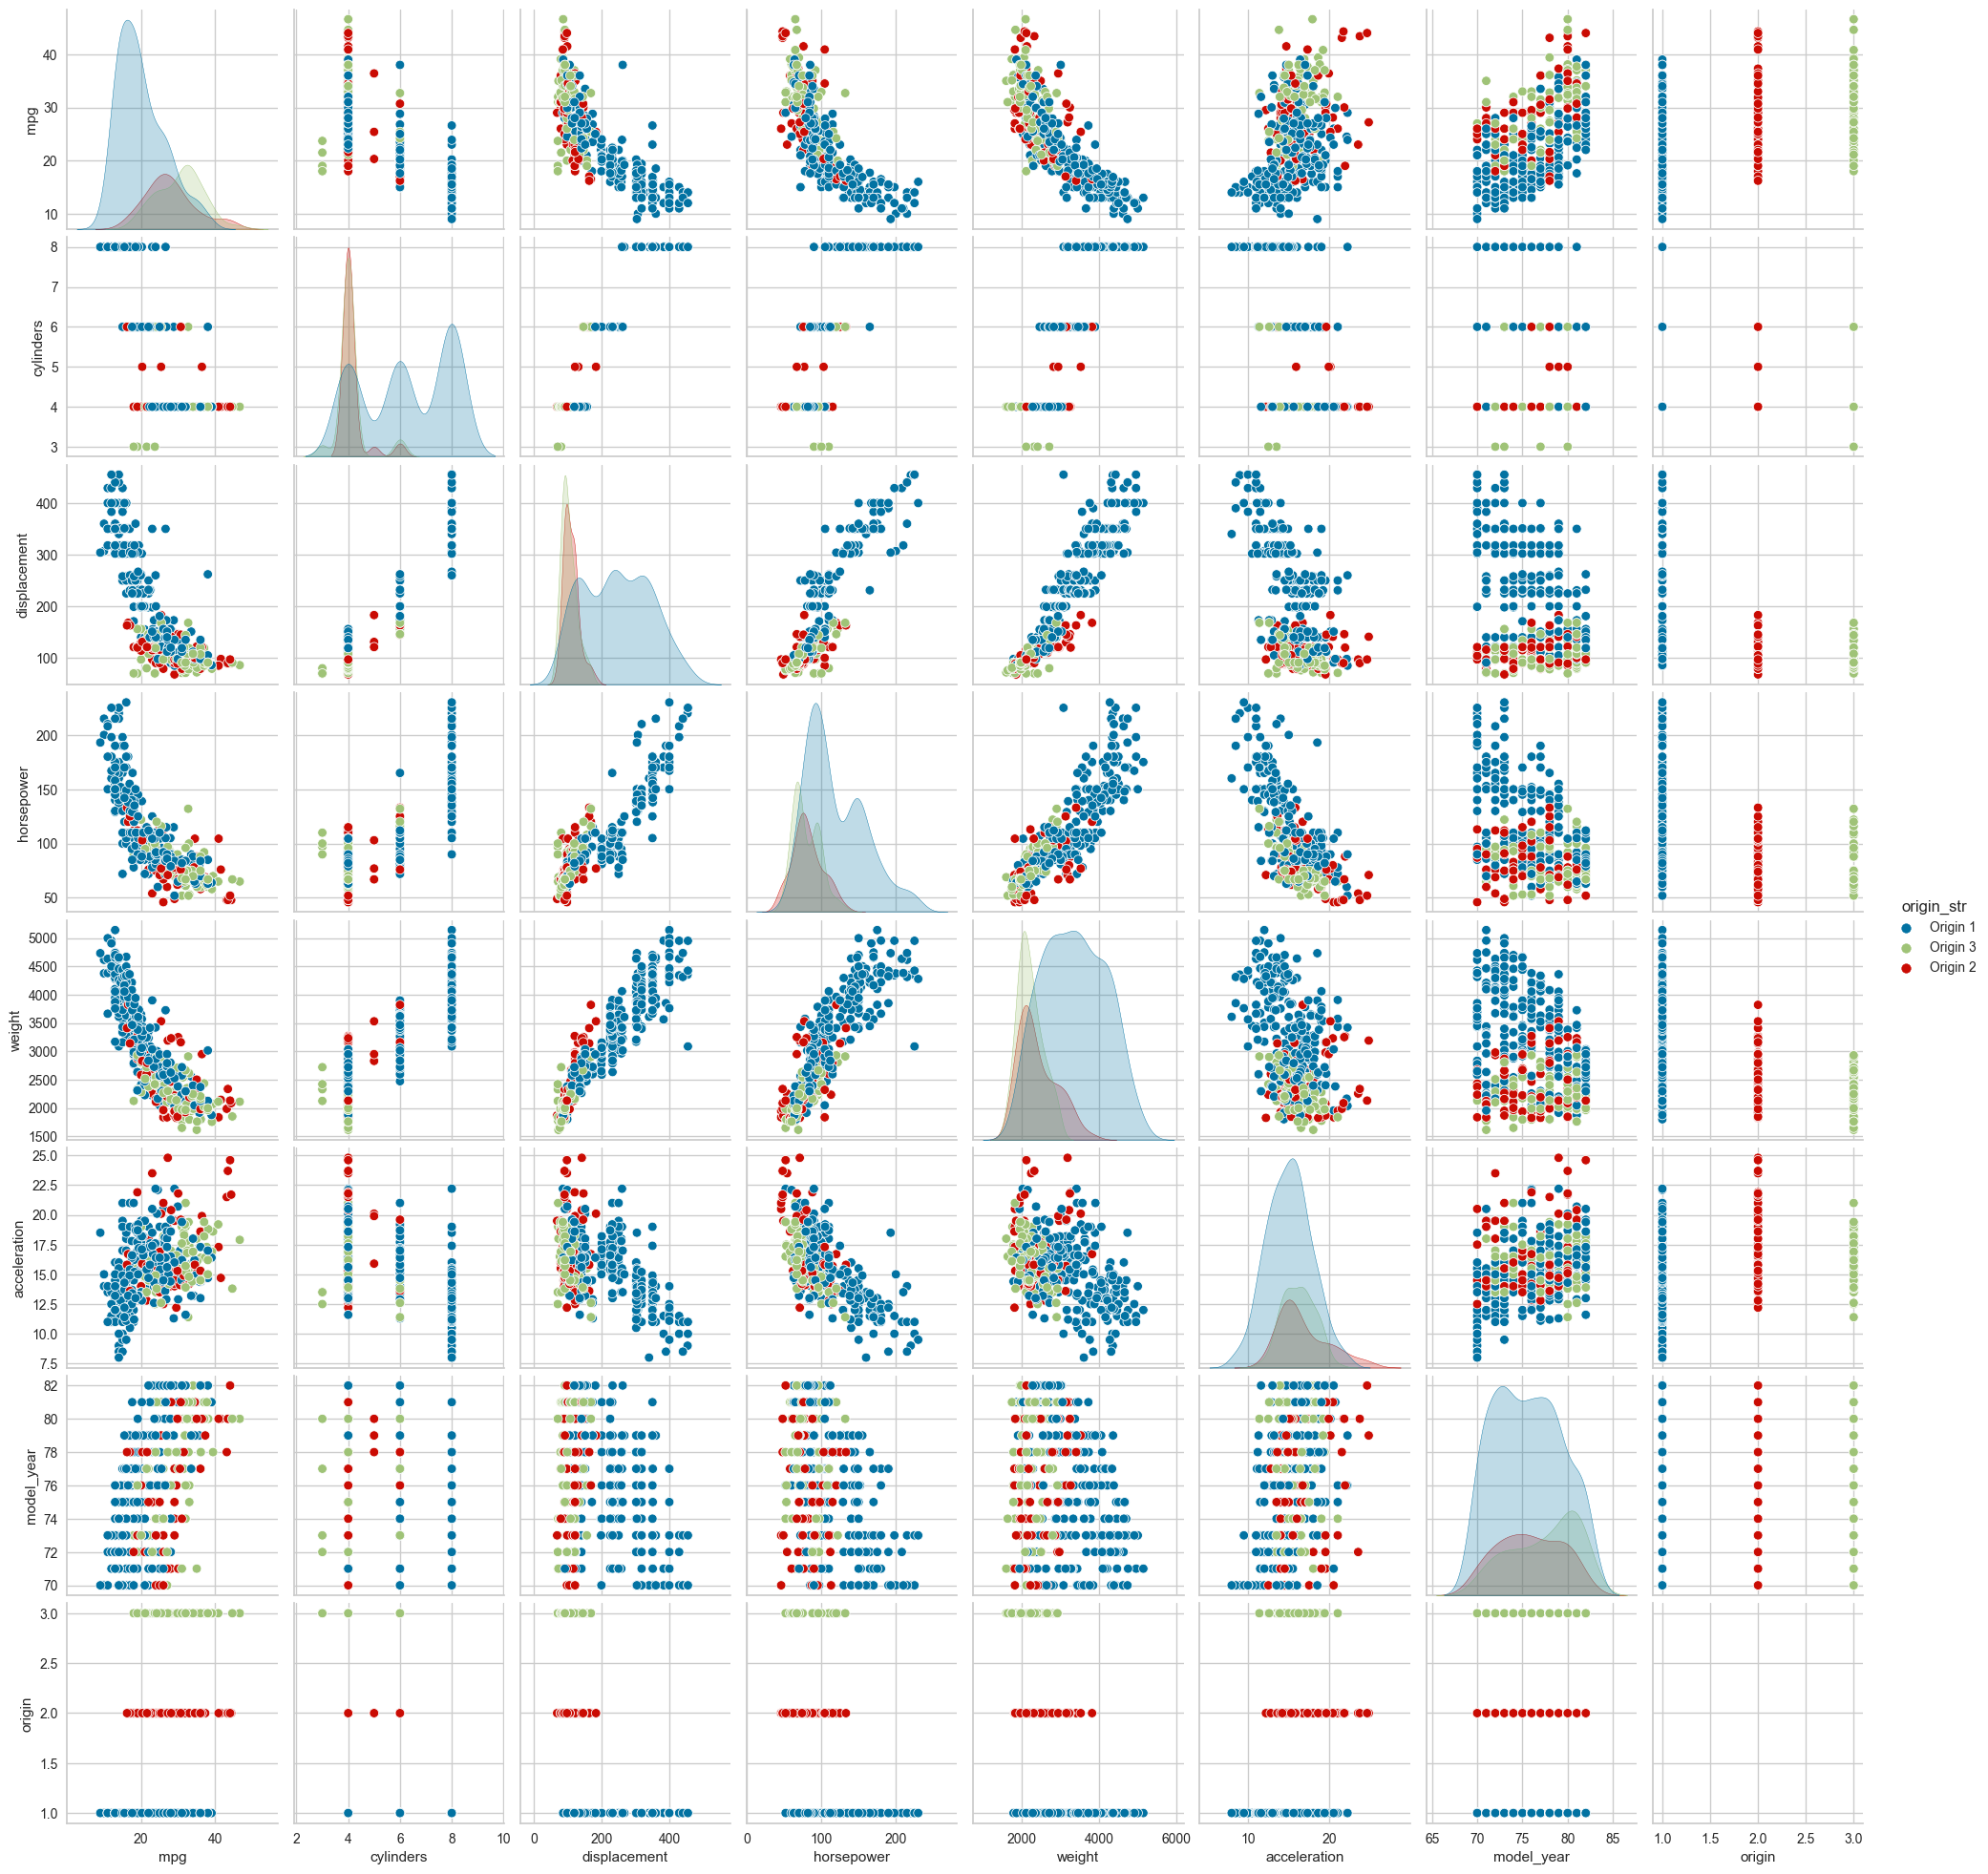

In [16]:
# TO DO: Plot pairplot (0.5 marks)
data['origin_str'] = data['origin'].replace([1, 2, 3], ['Origin 1', 'Origin 2', 'Origin 3'])
sns.pairplot(data, hue='origin_str')

<Axes: >

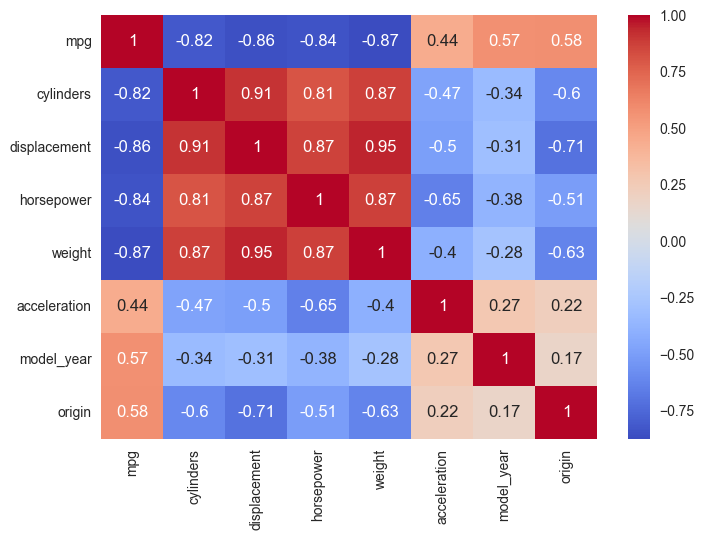

In [17]:
# TO DO: Plot correlation matrix (0.5 marks)
data = data.drop('origin_str', axis=1)
sns.heatmap(data.corr(method='spearman'), annot=True, cmap='coolwarm')

In [18]:
# TO DO: Print model coefficients and intercept (0.5 marks)
# Print the intercept and the coefficients with corresponding feature names
print(f"Intercept: {linreg.intercept_}")
print(dict(zip(X.columns, linreg.coef_)))

Intercept: -16.468120679497826
{'cylinders': -0.5247604819600444, 'displacement': 0.021552607958494834, 'horsepower': -0.019626226659473917, 'weight': -0.006329895928304136, 'acceleration': 0.12656788390106394, 'model_year': 0.7254855798637271, 'origin': 1.5076348945685623}


### Questions (6 marks)
1. Did using a linear model produce good results for this dataset? Why or why not?
1. Do the coefficients for each of the features make sense when compared to the `pairplot` and the correlation matrix? Why or why not?
1. If you repeat this analysis with ridge regression, do the results change significantly? Why do you think is the cause of these (changed or unchanged) results?

*ANSWER HERE*

1. The results were OK, but I think they would be improved with a more complex model. Since the testing score (~0.844) was higher than the training score (~0.817), the model is likely underfitting the data. Looking at the pairplot, it also appears like a linear relationship is not the best fit for multiple features in X. A more complex model would likely perform better than the linear model.

2. I think that some, but not all of the coefficients make general sense when compared to the `pairplot` and correlation matrix. I expected that features that are negatively (or positively) correlated on the correlation matrix/pairplot would all have negative (or positive) coefficients. This was the case for most features like: cylinders, horsepower, weight, acceleration, origin and year. However this was not the case for displacement, which has a relatively strong negative correlation (-0.86), but a positive coefficient (~0.02). I think this is likely due to the linear model being too simple for the data. Looking at the pairplot, it is obvious for certain features (like displacement) that the relationship is not linear. Another cause of this could be multicollinearity, which is when two or more features are correlated with eachother and therefore provide similar information about the target variable. Since displacement is highly correlated with weight (0.95), that could be making it difficult for the model to separate the impact that displacement is having on the target.

3. When repeating the results with ridge regression, the results did not change significantly. Based on the coefficients and performance of the model, it appeared to be underfitting the data. Since the original model was not overfitting, ridge's regularization will have a minimal effect. The original model also had relatively small coefficients to begin with, so ridge regularization will make less of a difference as it aims to reduce the value of coefficiencts. With an alpha of 100, I was able to slightly increase the validation score (to 0.848). This was likely due to the ridge regression removing / reducing the impact of collinear features.


In [19]:
# Test run with ridge regression to compare with linear regression, results did not change significantly
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=100).fit(X_train, y_train)
print("Ridge Training R^2:", ridge.score(X_train, y_train))
print("Ridge Test R^2:", ridge.score(X_test, y_test))

Ridge Training R^2: 0.8133859391175361
Ridge Test R^2: 0.8484594313084481


### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE - BE SPECIFIC*


1. I sourced my code from the ENSF611 Lab Assignments, mainly from Lab 2: Visualization Practice and Lab 3: Linear Models Practice.

2. I completed the steps in the order that they are asked in the assignment.

3. I did not use ChatGPT for part 2.

4. In Part 2, I was confused about some of the discrepancies in the coefficients I was seeing, I spoke with some classmates on the topic(specifically multicollinearity)

## Part 3: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challenging, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

- I liked that the coding portion of the assignment was not tedious and was similar to the labs / practice. It allowed me to focus on understanding the ML concepts better.

- I personally was not very interested in the mpg dataset and did not find any of the insights revealing, however, I thought the spam / not spam dataset was interesting and would like to continue to use it in the future.

- Working with simple linear models has me excited to start using more complex models to resolve some of the issues faced in this assignment, as opposed to just accepting it as is.

- As mentioned earlier, I found the discrepancies between coefficients and correlations difficult to wrap my head around without assistance.